In [9]:
import pandas as pd
pd.set_option('display.max_rows', 500)
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model, svm, tree
from sklearn.ensemble import RandomForestRegressor
from  sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler


# Initial Predictions

In [10]:
data = pd.read_csv("https://raw.githubusercontent.com/ahmetsirel/ozu_data_science/master/M5%20-%20General%20Linear%20Models/cell2cell-v1.csv")
data = data.drop(["Unnamed: 0",	"X",	"customer",	"traintest", "churndep"], axis=1)

In [11]:
def prepare_data(exclude_columns=None):
    data = pd.read_csv("https://raw.githubusercontent.com/ahmetsirel/ozu_data_science/master/M5%20-%20General%20Linear%20Models/cell2cell-v1.csv")
    data = data.drop(["Unnamed: 0",	"X",	"customer",	"traintest", "churndep"], axis=1)
    
    if exclude_columns is not None:
        data = data.drop(exclude_columns, axis=1)

    data = data.dropna(subset=["revenue"])
    x = data.drop('revenue', axis=1)
    
    y = data['revenue']

    

    x_train, x_test, y_train, y_test = train_test_split(
        x, y, test_size=0.33, random_state=42)
    return x_train, x_test, y_train, y_test

In [12]:
def scale_data(x_train, x_test, scaler=StandardScaler):

    scaler = scaler()
    scaler.fit(x_train)

    x_train_scaled = scaler.transform(x_train)
    x_train_scaled = pd.DataFrame(x_train_scaled, index=x_train.index, columns=x_train.columns)

    x_test_scaled = scaler.transform(x_test)
    x_test_scaled = pd.DataFrame(x_test_scaled, index=x_test.index, columns=x_test.columns)

    x_train_scaled.fillna(x_train_scaled.mean(), inplace=True)
    x_test_scaled.fillna(x_test_scaled.mean(), inplace=True)

    return x_train_scaled, x_test_scaled



In [13]:
def evaluate_regression(y_true_train, y_pred_train, y_true_test, y_pred_test, model_name=""):   
    return pd.DataFrame.from_records([[
                                       metrics.mean_squared_error(y_true_train, y_pred_train),
                                       metrics.mean_absolute_error(y_true_train, y_pred_train),
                                       metrics.max_error(y_true_train, y_pred_train),
                                       metrics.r2_score(y_true_train, y_pred_train), 
                                      metrics.mean_squared_error(y_true_test, y_pred_test),
                                       metrics.mean_absolute_error(y_true_test, y_pred_test),
                                       metrics.max_error(y_true_test, y_pred_test),
                                       metrics.r2_score(y_true_test, y_pred_test)]], 
                                     
                                     index=[model_name], 
                                     columns=['mean_squared_error_train', 'mean_absolute_error_train', 'max_error_train', "r2_score_train",
                                              'mean_squared_error_test', 'mean_absolute_error_test', 'max_error_test', "r2_score_test"])


In [14]:
def run_models(x_train, x_test, y_train, y_test):
        results = pd.DataFrame()
        for model in [linear_model.LinearRegression(), 
                        linear_model.RidgeCV(),
                        linear_model.LassoCV(),
                        svm.LinearSVR(),
                        #svm.SVR(kernel="rbf",),
                        #svm.SVR(kernel="poly"),
                        tree.DecisionTreeRegressor()]:
                #print(type(model).__name__, "Started")
                model.fit(x_train, y_train)
                #print(type(model).__name__, "Ended")
                y_train_pred = model.predict(x_train)
                y_test_pred = model.predict(x_test)

                results = results.append(evaluate_regression(y_train, y_train_pred, y_test, y_test_pred,
                                        model_name=model))
        return results


In [15]:
def run(exclude_columns=None, name=""):
    print(name)
    x_train, x_test, y_train, y_test = prepare_data(exclude_columns=exclude_columns)
    x_train, x_test = scale_data(x_train, x_test, scaler=StandardScaler)

    results = run_models(x_train, x_test, y_train, y_test)

    print("Min mean_squared_error_test Test",results.sort_values("mean_squared_error_test").iloc[0]["mean_squared_error_test"])

    return results.sort_values("mean_squared_error_test")

In [16]:
results = run(exclude_columns=None, name="Initial Run")

Initial Run
/anaconda/envs/azureml_py36/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
Min mean_squared_error_test Test 196.89180708932494


In [17]:
results

,mean_squared_error_train,mean_absolute_error_train,max_error_train,r2_score_train,mean_squared_error_test,mean_absolute_error_test,max_error_test,r2_score_test
"LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,\n max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,\n positive=False, precompute='auto', random_state=None,\n selection='cyclic', tol=0.0001, verbose=False)",1.686403e+02,6.677830e+00,750.017244,0.914163,196.891807,6.794273,642.781711,0.898655
"RidgeCV(alphas=array([ 0.1, 1. , 10. ]), cv=None, fit_intercept=True,\n gcv_mode=None, normalize=False, scoring=None, store_cv_values=False)",1.684665e+02,6.697422e+00,746.115981,0.914251,197.299005,6.817337,645.375705,0.898445
"LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)",1.684664e+02,6.697079e+00,746.356642,0.914251,197.305544,6.816871,645.726137,0.898442
"LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,\n intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,\n random_state=None, tol=0.0001, verbose=0)",1.841639e+02,6.308684e+00,933.428558,0.906261,205.918668,6.436017,694.119011,0.894009
"DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,\n max_features=None, max_leaf_nodes=None,\n min_impurity_decrease=0.0, min_impurity_split=None,\n min_samples_leaf=1, min_samples_split=2,\n min_weight_fraction_leaf=0.0, presort='deprecated',\n random_state=None, splitter='best')",5.693213e-11,6.830397e-08,0.001621,1.000000,271.949260,7.439995,556.152504,0.860021


# (i) variable interaction

In [18]:
corr = data.corr().unstack().reset_index(name='corr').rename(columns={'level_0': 'V1', 'level_1': 'V2'})
corr['corr_abs'] = np.abs(corr['corr'])
corr = corr[corr.V1 != corr.V2]
corr = corr.sort_values('corr_abs', ascending=False)
corr_with_label = corr[corr.V1 == "revenue"].copy()
corr['key'] = corr.apply(lambda x: str(sorted((x.V1, x.V2))) , axis=1)

corr = corr.drop_duplicates(subset='key').drop('key', axis=1)


len(corr)

2211

## Detect the columns with high correlation with each other and drop the one has lower corr with LABEL

In [19]:
corr_wide = corr.merge(corr_with_label[["V2","corr","corr_abs"]], left_on="V1", right_on="V2" , how="left", suffixes=(None, "_V1_corr_with_label")).drop("V2_V1_corr_with_label",axis=1).merge(corr_with_label[["V2","corr","corr_abs"]], left_on="V2", right_on="V2" , how="left", suffixes=(None, "_V2_corr_with_label"))#.drop("V2_V2_corr_with_label",axis=1)
corr_wide.head()

,V1,V2,corr,corr_abs,corr_V1_corr_with_label,corr_abs_V1_corr_with_label,corr_V2_corr_with_label,corr_abs_V2_corr_with_label
0,mailres,mailord,0.967843,0.967843,-0.098265,0.098265,-0.096903,0.096903
1,retcall,retcalls,0.957813,0.957813,0.014550,0.014550,0.015345,0.015345
2,models,phones,0.889472,0.889472,0.238935,0.238935,0.245192,0.245192
3,mourec,mou,0.832720,0.832720,0.607243,0.607243,0.711411,0.711411
4,incmiss,creditcd,-0.819104,0.819104,0.078708,0.078708,-0.087428,0.087428


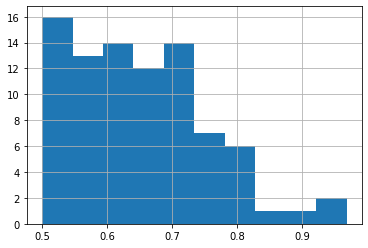

In [20]:
corr[corr.corr_abs >= 0.5].corr_abs.hist()

In [21]:
def columns_to_drop(row):
    if row.corr_abs_V1_corr_with_label > row.corr_abs_V2_corr_with_label:
        row["column_to_drop"] = row.V2 
        row["corr_with_label_column_to_drop"] = row.corr_abs_V2_corr_with_label
    
    else:
        row["column_to_drop"] = row.V1 
        row["corr_with_label_column_to_drop"] = row.corr_abs_V1_corr_with_label
    return row

corr_wide = corr_wide.apply(columns_to_drop, axis=1)
corr_wide.head()

,V1,V2,corr,corr_abs,corr_V1_corr_with_label,corr_abs_V1_corr_with_label,corr_V2_corr_with_label,corr_abs_V2_corr_with_label,column_to_drop,corr_with_label_column_to_drop
0,mailres,mailord,0.967843,0.967843,-0.098265,0.098265,-0.096903,0.096903,mailord,0.096903
1,retcall,retcalls,0.957813,0.957813,0.014550,0.014550,0.015345,0.015345,retcall,0.014550
2,models,phones,0.889472,0.889472,0.238935,0.238935,0.245192,0.245192,models,0.238935
3,mourec,mou,0.832720,0.832720,0.607243,0.607243,0.711411,0.711411,mourec,0.607243
4,incmiss,creditcd,-0.819104,0.819104,0.078708,0.078708,-0.087428,0.087428,incmiss,0.078708


In [22]:
columns_to_drop_high_corr = corr_wide[(corr_wide.corr_abs >= 0.8) ].column_to_drop.unique().tolist()
columns_to_drop_high_corr

['mailord', 'retcall', 'models', 'mourec', 'incmiss', 'blckvce', 'creditcd']

## Columns with low corr. with the label columns.

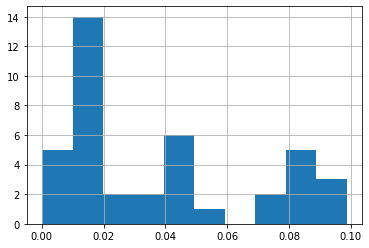

In [23]:
corr_with_label[corr_with_label.corr_abs<0.1].corr_abs.hist()

In [28]:
columns_to_drop_low_corr_with_label = corr_with_label[corr_with_label.corr_abs<0.1].V2.unique().tolist()
columns_to_drop_low_corr_with_label

['marryyes',
 'mailres',
 'mailord',
 'ownrent',
 'creditcd',
 'income',
 'marryun',
 'pcown',
 'incmiss',
 'occprof',
 'credita',
 'children',
 'refurb',
 'newcelln',
 'travel',
 'actvsubs',
 'truck',
 'occret',
 'prizmtwn',
 'mailflag',
 'prizmub',
 'changem',
 'retaccpt',
 'changer',
 'occcler',
 'newcelly',
 'retcalls',
 'occcrft',
 'retcall',
 'uniqsubs',
 'refer',
 'callfwdv',
 'rv',
 'churn',
 'prizmrur',
 'occhmkr',
 'occself',
 'mcycle',
 'occstud',
 'months']

## Experiments

In [25]:
run(exclude_columns=columns_to_drop_high_corr, name="Drop high corr. columns.")



Min mean_squared_error_test Test 196.05076414709063


,mean_squared_error_train,mean_absolute_error_train,max_error_train,r2_score_train,mean_squared_error_test,mean_absolute_error_test,max_error_test,r2_score_test
"LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,\n max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,\n positive=False, precompute='auto', random_state=None,\n selection='cyclic', tol=0.0001, verbose=False)",1.691241e+02,6.688633e+00,760.636494,0.913917,196.050764,6.807729,632.258698,0.899088
"RidgeCV(alphas=array([ 0.1, 1. , 10. ]), cv=None, fit_intercept=True,\n gcv_mode=None, normalize=False, scoring=None, store_cv_values=False)",1.689200e+02,6.704664e+00,755.793396,0.914020,196.223881,6.823008,635.457514,0.898999
"LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)",1.689199e+02,6.704298e+00,756.032592,0.914021,196.229172,6.822532,635.809888,0.898996
"LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,\n intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,\n random_state=None, tol=0.0001, verbose=0)",1.844479e+02,6.314852e+00,939.584598,0.906117,205.089085,6.440694,688.395099,0.894436
"DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,\n max_features=None, max_leaf_nodes=None,\n min_impurity_decrease=0.0, min_impurity_split=None,\n min_samples_leaf=1, min_samples_split=2,\n min_weight_fraction_leaf=0.0, presort='deprecated',\n random_state=None, splitter='best')",5.693213e-11,6.830397e-08,0.001621,1.000000,279.161548,7.445244,568.607506,0.856309


In [27]:
run(exclude_columns=columns_to_drop_low_corr_with_label, name="Drop low corr. columns.")


Min mean_squared_error_test Test 198.82223999760512


,mean_squared_error_train,mean_absolute_error_train,max_error_train,r2_score_train,mean_squared_error_test,mean_absolute_error_test,max_error_test,r2_score_test
"LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,\n max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,\n positive=False, precompute='auto', random_state=None,\n selection='cyclic', tol=0.0001, verbose=False)",1.701614e+02,6.710614e+00,7.496031e+02,0.913389,198.822240,6.830365,642.342527,0.897661
"RidgeCV(alphas=array([ 0.1, 1. , 10. ]), cv=None, fit_intercept=True,\n gcv_mode=None, normalize=False, scoring=None, store_cv_values=False)",1.700547e+02,6.718773e+00,7.454259e+02,0.913443,199.203528,6.840473,646.202998,0.897465
"LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)",1.700546e+02,6.718320e+00,7.456657e+02,0.913443,199.209646,6.839894,646.556552,0.897462
"LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,\n intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,\n random_state=None, tol=0.0001, verbose=0)",1.851530e+02,6.356519e+00,9.355506e+02,0.905758,207.338583,6.482891,694.300500,0.893278
"DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,\n max_features=None, max_leaf_nodes=None,\n min_impurity_decrease=0.0, min_impurity_split=None,\n min_samples_leaf=1, min_samples_split=2,\n min_weight_fraction_leaf=0.0, presort='deprecated',\n random_state=None, splitter='best')",4.136804e-31,5.322314e-17,1.421085e-14,1.000000,339.655556,8.360344,541.967506,0.825171


In [29]:
run(exclude_columns=list(set(columns_to_drop_high_corr+columns_to_drop_low_corr_with_label)))


Min mean_squared_error_test Test 198.00950518078446


,mean_squared_error_train,mean_absolute_error_train,max_error_train,r2_score_train,mean_squared_error_test,mean_absolute_error_test,max_error_test,r2_score_test
"LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,\n max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,\n positive=False, precompute='auto', random_state=None,\n selection='cyclic', tol=0.0001, verbose=False)",1.704678e+02,6.724382e+00,7.585609e+02,0.913233,198.009505,6.849096,633.890679,0.898080
"RidgeCV(alphas=array([ 0.1, 1. , 10. ]), cv=None, fit_intercept=True,\n gcv_mode=None, normalize=False, scoring=None, store_cv_values=False)",1.703951e+02,6.726942e+00,7.549237e+02,0.913270,198.104389,6.850261,636.469822,0.898031
"LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)",1.703949e+02,6.726466e+00,7.551625e+02,0.913270,198.109479,6.849677,636.824584,0.898028
"LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,\n intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,\n random_state=None, tol=0.0001, verbose=0)",1.859769e+02,6.365024e+00,9.448338e+02,0.905339,207.224547,6.493972,691.158461,0.893336
"DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,\n max_features=None, max_leaf_nodes=None,\n min_impurity_decrease=0.0, min_impurity_split=None,\n min_samples_leaf=1, min_samples_split=2,\n min_weight_fraction_leaf=0.0, presort='deprecated',\n random_state=None, splitter='best')",3.763119e-31,4.977943e-17,1.421085e-14,1.000000,341.833425,8.327395,541.967506,0.824050


## Result

### Min mean_squared_error_test Test
* Base                                              :196.891
* Drop one of high corr. columns with each other    :196.050
* Drop columns that have low corr with label        :198.822
* Drop both of the above combined                   :198.009

# (ii) variable transformation

# (iii)multi-collinearity issues

# (iv) feature elimination & selection

# (v) model selection